<a href="https://colab.research.google.com/github/PXDHU/TensorFlow/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

Regression Problem: Predicting a numerical variable based on some other combinations of varible, even shorter.. predicting a number.

In [ ]:
# Import tensorflow 
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating a data to view and fit

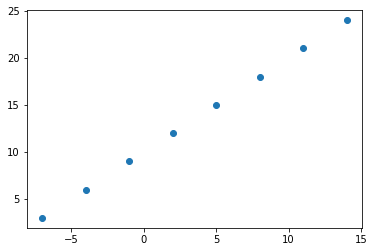

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Vizualize it
plt.scatter(X,y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

  ## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn our Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.0>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape 

(TensorShape([]), TensorShape([]))

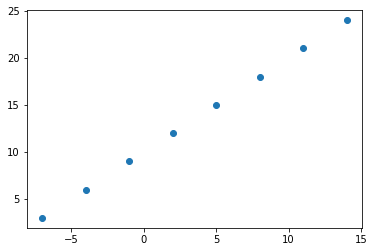

In [ ]:
plt.scatter(X, y)

## Steps in modelling with tensorflow 

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function(in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the pattern in its learning) and evaluation metrics(what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y( features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(1234)

# 1. Create a model using the Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,#mae is short form for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short form for stochastic gradient descent
              metrics=["mae"]
)

# 3.Fit the model 
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 611ms/step - loss: 20.7252 - mae: 20.7252
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 20.3773 - mae: 20.3773
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 20.0960 - mae: 20.0960
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 19.8148 - mae: 19.8148
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 19.5335 - mae: 19.5335


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 115ms/step


array([[-21.105017]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1.**Create a model** - Here we might add more layers, increasing the number of hidden layers, change the activation function of each layer.

2.**Compile the model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3.**Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give more examples to learn from).

In [ ]:
X , y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's rebuild our model 

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X,axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 354ms/step - loss: 18.8245 - mae: 18.8245
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 18.5433 - mae: 18.5433
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 18.2620 - mae: 18.2620
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 17.9808 - mae: 17.9808
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 17.6995 - mae: 17.6995
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 17.4183 - mae: 17.4183
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 17.1370 - mae: 17.1370
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 16.8558 - mae: 16.8558
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 16.5745 - mae: 16.5745
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 16.2933 - mae: 16.2933
Epoch 11/100
1/1 [==============================]

In [ ]:
# Remind ourselves of the data
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved..
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[29.720049]], dtype=float32)

### Common ways to improve a deep model
  1. Adding layers
  2. Increasing the number of hidden units
  3. Change the activation function
  4. Change the optimization function
  5. Change the learning rate
  6. Fitting on more data
  7. Fitting for longer

In [ ]:
# Giving a try 

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model 
model.fit(tf.expand_dims(X,axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 600ms/step - loss: 12.1408 - mae: 12.1408
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4625 - mae: 11.4625
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.7755 - mae: 10.7755
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0790 - mae: 10.0790
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 9.3716 - mae: 9.3716
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.6515 - mae: 8.6515
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9165 - mae: 7.9165
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1645 - mae: 7.1645
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 6.8620 - mae: 6.8620
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.1462 - mae: 7.1462
Epoch 11/100
1/1 [==============================] - 0s 10ms/step 

In [ ]:
X, y


(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 119ms/step


array([[27.623991]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> tweak a model->
fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualise, Visualise, Visualise"

* The data - what data are we working with? What does it look like?
* The model - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels) ?


In [ ]:
# Make a bigger a dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make the labels for the datasets
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

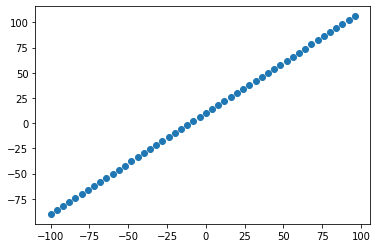

In [ ]:
# Visualize the data 
plt.scatter(X, y)

### The 3 sets..

* **Training set** - model learn from this data
70-80% of data
* **Validation set** - model gets tuned on this data 10-15% of data
* **Test set** - model gets evaluated on this data 10-15%


In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 (80%)
y_train = y[:40] 
X_test = X[40:] # last 10 (20%)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again

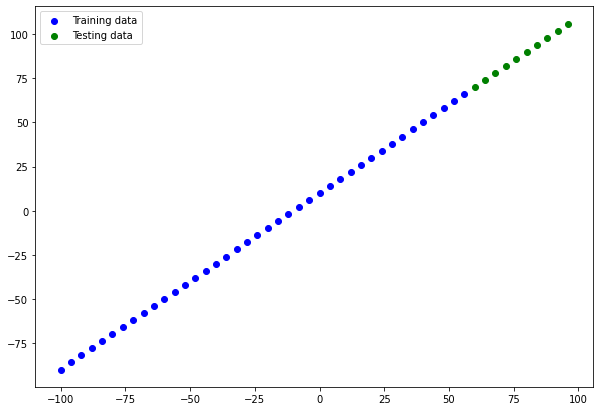

In [ ]:
plt.figure(figsize=(10, 7)) #size of the plot
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Build a neural network model for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters(patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resources:** MIT's introduction to deep learning



In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100,verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


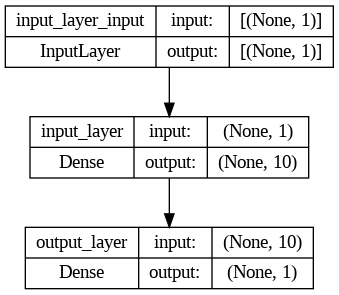

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction
To visualize predictions,plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[34.84039 ],
       [37.066753],
       [39.293114],
       [41.51947 ],
       [43.74584 ],
       [45.9722  ],
       [48.19856 ],
       [50.42492 ],
       [52.651283],
       [54.877636]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  plots training data, test data and compares predictions to the ground truth labels.
  """
  plt.figure(figsize=(10,7))
# Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
# Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
# plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
# Show the legend
  plt.legend();


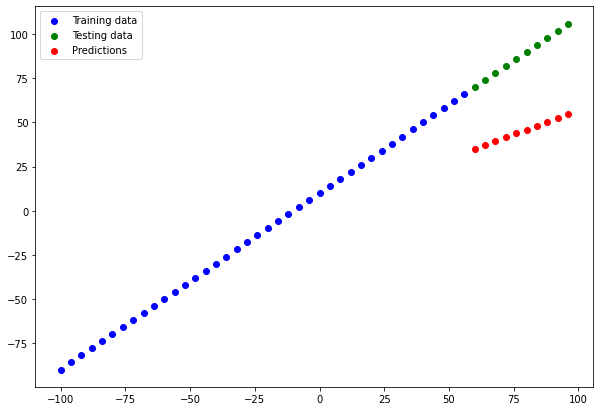

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean squared error, "square the average errors"
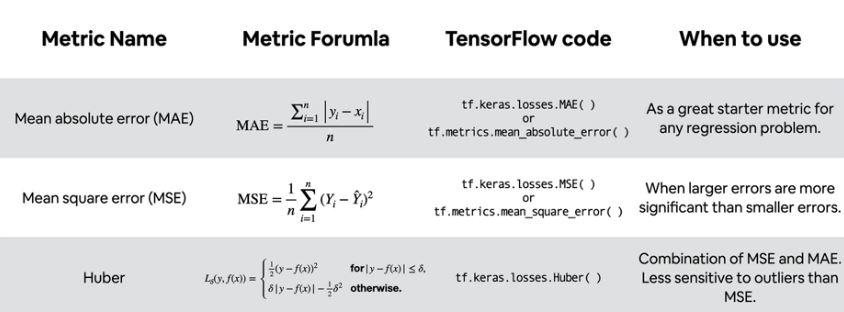


In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 152ms/step - loss: 43.1410 - mae: 43.1410


[43.14098358154297, 43.14098358154297]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.159607, 50.933247, 48.706886, 46.48053 , 44.25416 , 42.0278  ,
       39.80144 , 37.57508 , 35.348717, 33.122364], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[34.84039 ],
       [37.066753],
       [39.293114],
       [41.51947 ],
       [43.74584 ],
       [45.9722  ],
       [48.19856 ],
       [50.42492 ],
       [52.651283],
       [54.877636]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.84039 , 37.066753, 39.293114, 41.51947 , 43.74584 , 45.9722  ,
       48.19856 , 50.42492 , 52.651283, 54.877636], dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=43.140984>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1887.0973>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))
  

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it..
```

1. Get more data - get more examples for your model to train on ( more oppurtunities to learn patterns or relationships between features and labels). 
2. Make your model larger (using a more complex model) - This might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build    `model_1`**

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 25.2640 - mae: 25.2640
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9125 - mae: 9.9125
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 10.6085 - mae: 10.6085
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6051 - mae: 9.6051
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5200 - mae: 10.5200
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.7406 - mae: 9.7406
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8300 - mae: 8.8300
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0680 - mae: 9.0680
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.3979 - mae: 19.3979
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.4751 - mae: 10.4751
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

1/1 [==============================] - 0s 58ms/step


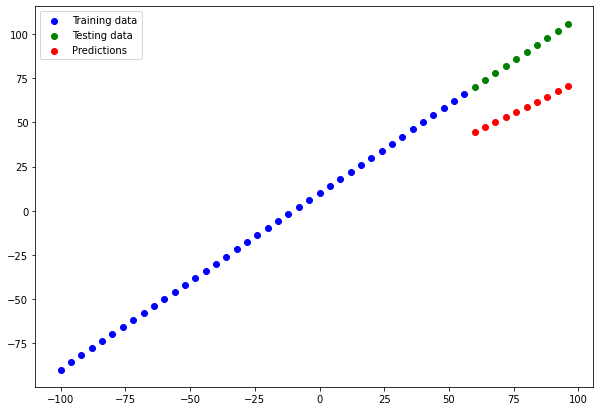

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.548893>,
 <tf.Tensor: shape=(), dtype=float32, numpy=943.59607>)

** Build `model_2`**
* 2 dense layers, trained for 100 epochs


In [ ]:
# Set the random seed
tf.random.set_seed = 42

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit a model
model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 29.9477 - mse: 1239.2260
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 26.0699 - mse: 896.1426
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 32.2316 - mse: 1522.7274
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 23.0682 - mse: 763.7512
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 13.7988 - mse: 231.8519
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0750 - mse: 135.8280
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0673 - mse: 183.7711
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8582 - mse: 133.2235
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 37.5584 - mse: 2173.1016
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.2158 - mse: 891.9445
Epoch 11/100
2/2 [===========================

1/1 [==============================] - 0s 66ms/step


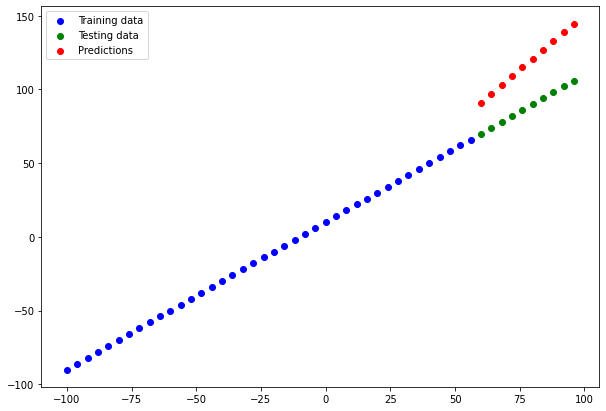

In [ ]:
# Make and plot predictions of model_2

y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.887806>,
 <tf.Tensor: shape=(), dtype=float32, numpy=924.6752>)

** Build `model_3`**
* 2 dense layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed=42

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# Fit the model 
model_3.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 24.3383 - mse: 1190.5295
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 23.2050 - mse: 782.0505
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 28.2254 - mse: 1193.0846
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 16.0921 - mse: 369.5963
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 22.5436 - mse: 744.3864
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 10.6087 - mse: 125.3210
Epoch 7/500
2/2 [==============================] - 0s 9ms/step - loss: 11.6086 - mse: 164.7126
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2728 - mse: 182.1504
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 42.3835 - mse: 2874.8210
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 29.5283 - mse: 1234.5598
Epoch 11/500
2/2 [===========================

1/1 [==============================] - 0s 76ms/step


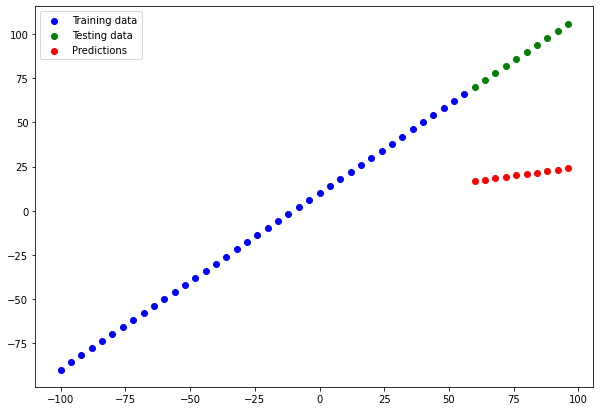

In [ ]:
# Make and predict model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.614784>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4655.826>)

** Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments
let's compare the results of all our experiments done so far.

In [ ]:
# Let's compare our model's results
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame( model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.548893,943.596069
1,model_2,29.887806,924.675171
2,model_3,67.614784,4655.826172


Looks like `model_2` performed the best..

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

Resourses : 
* TensorBoard - a component of the TensorFlow library to help track modelling experiments.
* Weights & Biases - a tool of the tracking all kinds of machine learning experiments( plugs straight into TensorBoard).



## Saving our model

Saving our models allows us to use them outside of Google Colab(or wherever they were trained) such as in a web application or a mobile app.
There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDf5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in our saved model

In [ ]:
# Load in the SavedModel format model 
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

OSError: ignored

In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds==loaded_SavedModel_format_preds

1/1 [==============================] - 0s 53ms/step


NameError: ignored

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with .h5 format
model_2_preds= model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 58ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model(or any other file) from Google Colab

1. go to files and right click on the file you're after and click download.
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it here (see the 2nd cell)

In [ ]:
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from google colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive

In [ ]:
!ls /content/drive/MyDrive

 21BAI1713.pdf
 best_model_HDF5_format.h5
'Colab Notebooks'
'Getting started.pdf'
 glove.6B.100d.txt
'Google Finance Investment Tracker.gsheet'
 IMG_5254.jpeg
 IMG_5256.jpeg
'Module 1.pdf'
 Object_Tracker
'OPTION TRADING.gsheet'
 Screenshot_2022-05-29-09-54-03-827_com.phonepe.app.jpg
 Screenshot_2022-05-29-10-08-51-176_com.phonepe.app.jpg
 Screenshot_2022-05-29-10-13-29-255_com.phonepe.app.jpg
 test-squad-trained
'VHelper - A Curriculum Chatbot'


## A larger example

In [ ]:
# import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our Dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and tests sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed = 42

# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model 
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8682.1328 - mae: 8682.1328
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7877.2607 - mae: 7877.2607
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7604.1235 - mae: 7604.1235
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7511.9204 - mae: 7511.9204
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7709.7319 - mae: 7709.7319
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7613.5781 - mae: 7613.5781
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7559.2441 - mae: 7559.2441
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7787.5854 - mae: 7787.5854
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7604.3657 - mae: 7604.3657
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7709.8999 - mae: 7709.8999

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8944.0615 - mae: 8944.0615


[8944.0615234375, 8944.0615234375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now the model isn't performing too well.. let's improve it!
To (try) improve our model, We'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizers
2. Train the above for longer(epochs=200)
3. (insert your own experiments here)

In [ ]:
# Set seed
tf.random.set_seed=43

# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13283.8389 - mae: 13283.8389
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13094.1143 - mae: 13094.1143
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12719.8516 - mae: 12719.8516
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12006.4893 - mae: 12006.4893
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10832.1592 - mae: 10832.1592
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9368.1533 - mae: 9368.1533
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8075.1475 - mae: 8075.1475
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7515.4731 - mae: 7515.4731
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7430.6147 - mae: 7430.6147
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7410.5273 - mae:

In [ ]:
# Evaluate the improved model
insurance_model_2.evaluate(X_test, y_test)

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8944.0615 - mae: 8944.0615


[8944.0615234375, 8944.0615234375]

In [ ]:
# Set seed 
tf.random.set_seed=43

# Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13295.4072 - mae: 13295.4072
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13115.4785 - mae: 13115.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12742.2959 - mae: 12742.2959
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12015.2002 - mae: 12015.2002
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10820.1631 - mae: 10820.1631
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9340.6221 - mae: 9340.6221
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8046.5581 - mae: 8046.5581
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7499.4141 - mae: 7499.4141
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7419.2754 - mae: 7419.2754
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7399.6060 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3492.8281 - mae: 3492.8281


[3492.828125, 3492.828125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8944.0615 - mae: 8944.0615


[8944.0615234375, 8944.0615234375]

Text(0.5, 0, 'epochs')

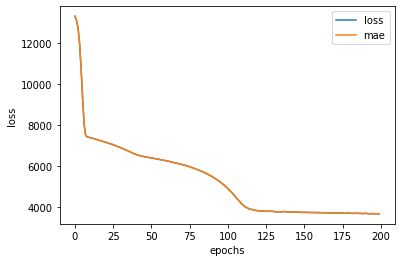

In [ ]:
import pandas as pd

# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

** Question: ** How long should you train for?

It depends. Really.. it depends on the problem you're working on. However, many people have asked this question before.. so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a Tensorflow component you can add to your model to stop thinking once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which on to use, you could try both and see which perform better.

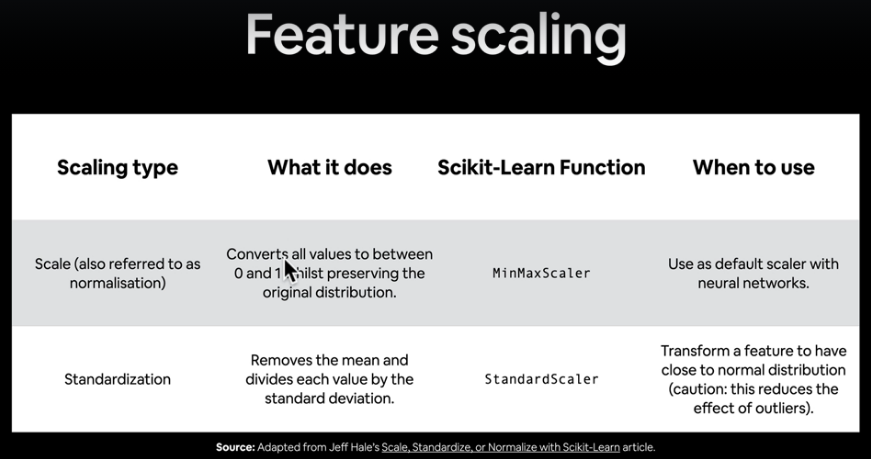

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


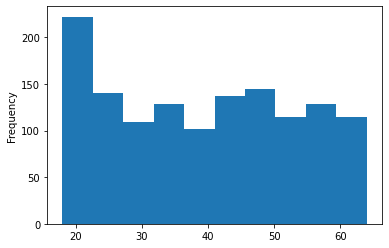

In [ ]:
X["age"].plot(kind="hist")

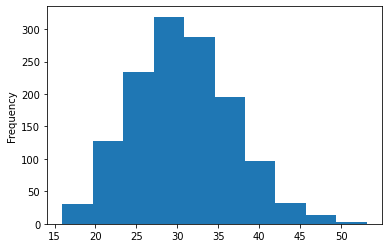

In [ ]:
X["bmi"].plot(kind="hist")

To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [86]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [87]:
# What does our data look like?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [92]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [93]:
X_train.shape , X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one hot encoded. Let's build a neural network model.

In [105]:
# Build a neural network model to fit on our normalized data
# set seed
tf.random.set_seed = 43

# Build a model
model_insurance = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
])

# Compile our model
model_insurance.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# Fit the model
model_history = model_insurance.fit(X_train_normal,y_train, epochs=100)





Epoch 1/100
34/34 [==============================] - 2s 7ms/step - loss: 13343.5342 - mae: 13343.5342
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13335.0586 - mae: 13335.0586
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13313.6123 - mae: 13313.6123
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13268.6572 - mae: 13268.6572
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.4014 - mae: 13189.4014
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13065.2812 - mae: 13065.2812
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12886.2021 - mae: 12886.2021
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12642.0430 - mae: 12642.0430
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12322.5264 - mae: 12322.5264
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11922.61

In [106]:
# Evaluate our model
model_insurance.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.9355 - mae: 3439.9355


[3439.935546875, 3439.935546875]

In [107]:
# insurance model 2 results
# 9/9 [==============================] - 0s 2ms/step - loss: 4653.2656 - mae: 4653.2656

In [108]:
insurance_model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               1200      
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________
